# Common Factor Analysis : CFA (공통요인분석)

전체 독립변수를 축약하는 점은 PCA와 같지만, 상관성이 높은 변수들을 묶어서 몇 개의 변수를 찾는다. (공통분산 기반)

예시) 
아이폰 구매 영향 요인 10개의 독립변수 : 디자인/성능/가격 이라는 3가지 요소로 묶어주는 것


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [6]:
df = pd.read_csv('datasets/nba2021_advanced.csv')
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [7]:
# 변수 선택 및 데이터 스케일 정규화

# 요인 분석할 칼럼만 선택(문자형 변수 제거)
df1 = df.drop(['Player','Pos','Tm','Age'],axis='columns')

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 칼럼명 결합
df_minmax = pd.DataFrame(data=df_minmax,columns=df1.columns)

df_minmax.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,...,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,...,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,...,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,...,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,...,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


### 바틀렛 테스트

행렬식을 이용하여 카이제곱값을 구하여 각 변수들 사이의 상관계수의 적합성을 검증하는 방법

p값이 0.05보다 작으면 변수들간에 상관관계가 있다는 뜻(대각행렬이 아님)으로 적합

In [8]:
chi_square_value,p_value = calculate_bartlett_sphericity(df_minmax)

# 카이스퀘어, P-value 확인
chi_square_value,p_value

(20174.082695118377, 0.0)

### KMO 검정

변수들간의 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값을 통계적으로 산출함

0.5 미만이면 부적합, 0.8이상이면 우수

In [9]:
kmo_all,kmo_test = calculate_kmo(df_minmax)
kmo_test # 0.5 이상이면 OK

c:\Users\hare0\AppData\Local\Programs\Python\Python310\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7017388419159649

주성분 변수들의 고유치(요인이 설명해주는 분산의 양)를 확인하여 요인의 개수 결정


In [14]:
# 전체 요인 적재값 확인(요인 적재값의 제곱 합 값들의 합, 분산의 60%이상을 설명해주는 요인까지 선정)
#  30개의 요인을 생성하고, 이 요인들이 데이터를 얼마나 잘 설명하는지를 나타내는 고유값과 설명된 분산을 계산

fa = FactorAnalyzer(n_factors=30,rotation=None) # FactorAnalyzer 객체 생성 
# n_factors : 요인의 개수 
# ratation : 요인 축을 회전시키는 방법 

fa.fit(df_minmax) 
ev, v = fa.get_eigenvalues() # ev는 고유값, v는 설명된 분산( 주성분 또는 요인이 얼마나 많은 정보를 나타내는지를 측정)

np.round_(ev,2) # 전체 칼럼의 개수만큼 요인별 적재 값 산출

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

In [16]:
v

array([ 7.89360748e+00,  3.46334947e+00,  2.18577116e+00,  1.53263624e+00,
        1.34065127e+00,  8.90038869e-01,  7.95957483e-01,  5.46644579e-01,
        4.75984541e-01,  3.76883297e-01,  3.15475233e-01,  2.12556605e-01,
        1.49509966e-01,  8.52146733e-02,  6.57756452e-02,  5.50189058e-02,
        3.10427667e-02,  1.47337400e-02,  2.43618730e-04, -2.00949652e-03,
       -2.49956005e-03, -2.66879618e-03])

In [15]:
ev

array([7.91186523e+00, 3.53471707e+00, 2.24783881e+00, 1.58706236e+00,
       1.45036137e+00, 1.05216046e+00, 8.55756037e-01, 6.72304539e-01,
       5.87606822e-01, 5.73673810e-01, 4.51554484e-01, 3.67980553e-01,
       2.37697861e-01, 1.74003702e-01, 1.10977496e-01, 7.96210886e-02,
       6.76824332e-02, 2.60241612e-02, 9.14449177e-03, 1.24122532e-03,
       6.81089750e-04, 4.49075760e-05])

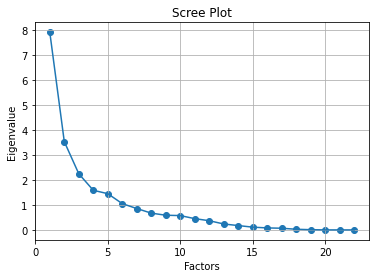

In [11]:
# Scree 도표 시각화 (주성분 개수 선택하는데 도움을 주는 그래프)

# x축 주성분 개수 / y축 분산의 크기(고유값)

plt.scatter(range(1,df_minmax.shape[1]+1),ev)
plt.plot(range(1,df_minmax.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# 4개의 요인 지점 이후 경사가 급격히 감소하기 때문에 4개의 요인 선정이 적절하다. 

In [12]:
# 요인 수 선정 및 요인-변수 간 요인 적재 값 확인

# 4개의 요인으로 변수 간의 상관관계(요인 적재값) 확인 
# 주어진 변수가 각각의 요인에 얼마나 영향을 받고 있는지를 측정하는 지표로 -1~1 사이, 클수록 변수와 요인간의 강한 관계

fa = FactorAnalyzer(n_factors=4,rotation='varimax') # 4개의 요인, Varimax 회전 사용 
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_,index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


<AxesSubplot:>

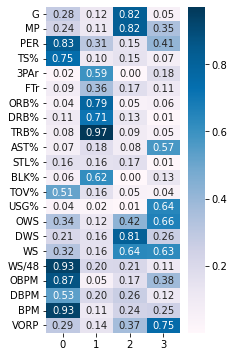

In [19]:
# 변수 간 요인적재값 시각화
# 요인별로 상관관계가 높은 변수를 직관적으로 확인 가능
plt.figure(figsize=(3,6))
sns.heatmap(abs(factor_loadings),cmap='PuBu',annot=True,fmt='.2f')